In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [248]:
def make_blobs(size=10,offset=0.5):
    x = np.random.rand(size)
    y = np.random.rand(size)

    x[x<.5]  -= offset
    y[y<.5]  -= offset
    
    return x,y

def make_cetonroids(x,y,k=1):

    centroids_x = np.random.uniform(min(x),max(x),size=k)
    centroids_y = np.random.uniform(min(y),max(y),size=k)
    centroids = np.vstack((centroids_x,centroids_y)).T
    return centroids

def dist_2_ponits(x_c = centroids[0][0], y_c = centroids[0][1], x_p = x[0], y_p = y[0]):
    d = np.sqrt((x_c-x_p)**2+(y_c-y_p)**2)
    return d

def dist_from_centroids(x,y,centroids):
    lst=[]
    for i in range(len(centroids)):
        for xi, yi in zip(x,y):
            x_p = xi
            x_c = centroids[i,0]
            y_p = yi
            y_c = centroids[i,1]
            d = np.sqrt((x_c-x_p)**2+(y_c-y_p)**2)
            lst.append(d)

    return np.argmin(np.array(lst).reshape(len(centroids),len(x)).T,axis=1)

def move_centroids(centroids,x,y,afilliation):
    for i in range(len(centroids)):
        x_mean = x[afilliation==i].mean()
        y_mean = y[afilliation==i].mean()
        centroids[i,0] = x_mean
        centroids[i,1] = y_mean
    return centroids

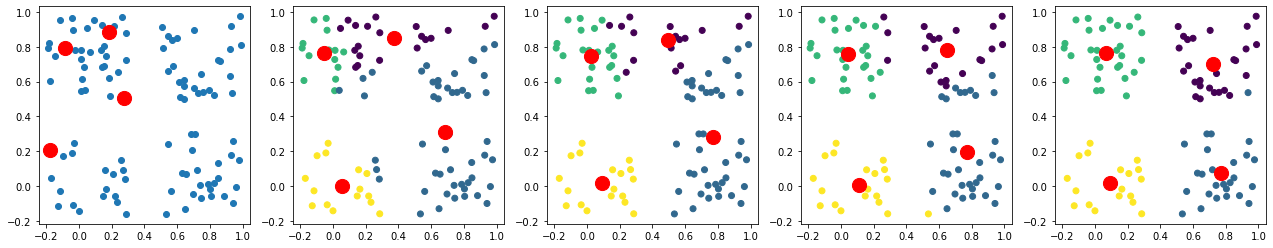

In [249]:
iterations = 5
x,y = make_blobs(size=100,offset=0.2)
centroids = make_cetonroids(x,y,4)
fig, ax = plt.subplots(1,interations,figsize=(22,4))
ax[0].scatter(x,y)
ax[0].scatter(x=centroids[:,0],y=centroids[:,1],s=200,c="red")
for i in range(1,iterations):
    afilliation = dist_from_centroids(x,y,centroids)
    centroids = move_centroids(centroids,x,y,afilliation)
    ax[i].scatter(x,y,c=afilliation)
    ax[i].scatter(x=centroids[:,0],y=centroids[:,1],s=200,c="red");

## Expanding to more dimensions

In [211]:
def make_blobs(size=10,offset=0.3,dim=3):
    X = np.random.rand(size,dim)
    for i in range(dim):
        X[:,i][X[:,i]<0.5] -= offset
    
    return X

def make_centroids(X,k=3):
    lower_bounds = np.min(X,axis=0)
    upper_bounds = np.max(X,axis=0)
    
    lst = []    
    for i in range(X.shape[1]):
        lst.append(np.random.uniform(lower_bounds[i],upper_bounds[i],size=k))
        
    centroids = np.vstack(lst).T
    return centroids

def dist_2_ponits(P,Q):
    d = np.sqrt(sum((P-Q)**2))
    return d

def dist_from_centroids(X,centroids):
    lst=[]
    for c in centroids:
        for x in X:
            d = dist_2_ponits(c,x)
            lst.append(d)
    return np.array(lst).reshape(len(centroids),len(X)).T

def move_centroids(centroids,X,afilliation):
    for i in range(len(centroids)):
        centroids[i,:]=np.mean(X[afilliation==i],axis=0)
    return centroids

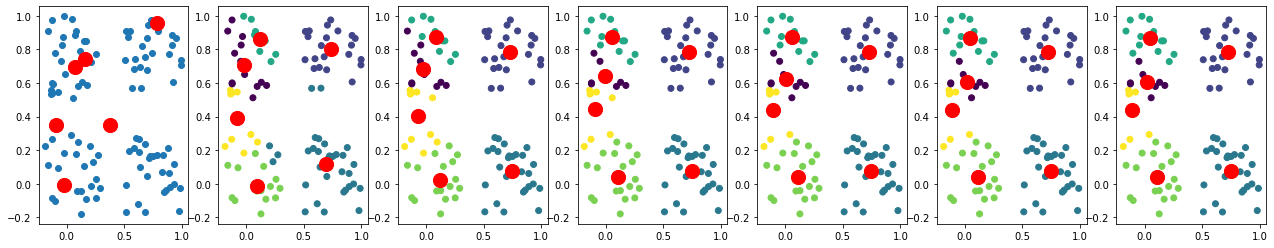

In [247]:
iterations = 7
dim = 2
k = 6
X = make_blobs(size=100,offset=0.2,dim=dim)
centroids = make_cetonroids(X,k=k)
fig, ax = plt.subplots(1,iterations,figsize=(22,4))
ax[0].scatter(x=X[:,0],y=X[:,1])
ax[0].scatter(x=centroids[:,0],y=centroids[:,1],s=200,c="red")
for i in range(1,iterations):
    distances = dist_from_centroids(X,centroids)
    afilliation = np.argmin(distances,axis=1)
    centroids = move_centroids(centroids,X,afilliation)
    ax[i].scatter(x=X[:,0],y=X[:,1],c=afilliation)
    ax[i].scatter(x=centroids[:,0],y=centroids[:,1],s=200,c="red");

In [235]:
X = make_blobs()
centroids = make_centroids(X)
distances = dist_from_centroids(X,centroids)
afilliation = np.argmin(distances,axis=1)

In [220]:
def move_centroids(centroids,X,afilliation):
    for i in range(len(centroids)):
        centroids[i,:]=np.mean(X[afilliation==i],axis=0)
    return centroids

In [208]:
centroids = make_cetonroids(X)

In [210]:
distances = dist_from_centroids(X,centroids)

In [219]:
X


array([[ 0.67376571,  0.62928903,  0.75789473],
       [-0.17206747,  0.0955136 , -0.18611214],
       [ 0.02594479,  0.7951861 ,  0.8186512 ],
       [ 0.16827519,  0.12677735,  0.19274264],
       [ 0.70490228, -0.01319209, -0.22319504],
       [ 0.51467759,  0.8800986 ,  0.15706017],
       [-0.02013099, -0.17660063,  0.82962108],
       [ 0.75848992,  0.80135202,  0.54835841],
       [-0.03962463,  0.68257007,  0.00499364],
       [ 0.737156  ,  0.74497077,  0.12632588]])

In [223]:
centroids = move_centroids(centroids,X,afilliation)

In [256]:
arr = np.array([0.1,0.2,3,4,21,32,5,3,3]).reshape(3,3)

In [258]:
arr.T

array([[ 0.1,  4. ,  5. ],
       [ 0.2, 21. ,  3. ],
       [ 3. , 32. ,  3. ]])

In [263]:
arr[0,:]

array([0.1, 0.2, 3. ])

In [286]:
if (n%2==1) or (n%2==1 and is in range(2,6)):
    print("Weird")
else:
    print("Not Weird")

SyntaxError: invalid syntax (<ipython-input-286-d574193ea6e0>, line 1)

In [294]:
n=20

In [289]:
5 in range(6,6)

False

In [297]:
n=20
if (n%2==1) or (n in range(6,21)):
    print("Weird")
    
elif (n%2==0 and n in range(2,6)) or (n%2==0 and n>20):
    print("Not Weird")

Weird


In [347]:
n=5
arr=[2,3,6,6,5]

print(max([i for i in arr if i != max(arr)]))
        



5


In [337]:
ar

6

In [333]:
x

6

In [ ]:
x = 